Sentiment analysis is a branch of natural language processing (NLP) that focuses on extracting subjective information from textual data and determining the sentiment or attitude expressed within the text. It involves analyzing and classifying text into categories such as positive, negative, or neutral, based on the emotions or opinions expressed by the words and phrases used.
It is important that thea algorithm is capable to identify the emotional tone of the message

I import the libraries and the data I need

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import csv
from google.colab import drive
import zipfile
from shutil import copyfile
from sklearn.feature_extraction.text import re
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB

drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
customer_reviews=pd.read_csv('/content/gdrive/MyDrive/customer_reviews.csv')
labelled_reviews=pd.read_csv('/content/gdrive/MyDrive/labelled_reviews.csv')


I check for the info of the dataset

In [ ]:
customer_reviews.info()
customer_reviews.isna().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105710 entries, 0 to 105709
Data columns (total 3 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   review_id    105710 non-null  int64 
 1   customer_id  105710 non-null  int64 
 2   review_text  105710 non-null  object
dtypes: int64(2), object(1)
memory usage: 2.4+ MB


review_id      0
customer_id    0
review_text    0
dtype: int64

The dataset customer review does not contain missing values

In [ ]:
customer_reviews

,review_id,customer_id,review_text
0,1,814256,I have bought several of the Vitality canned d...
1,2,457475,Product arrived labeled as Jumbo Salted Peanut...
2,3,104045,This is a confection that has been around a fe...
3,4,603662,If you are looking for the secret ingredient i...
4,5,739314,Great taffy at a great price. There was a wid...
...,...,...,...
105705,140942,224091,"We Love,Love our Keurig coffee maker .My husba..."
105706,140943,196666,This is supposed to be a light roast coffee bu...
105707,140944,618226,I have always been happy with my Kcups but thi...
105708,140945,844918,I ordered light roast coffee and was sent one ...


It contains 105710 reviews made by the customers.

the dataset labelled reviews contains also the sentiment associated to the reviews text

In [ ]:
labelled_reviews.info()
labelled_reviews.isna().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 462744 entries, 0 to 462743
Data columns (total 3 columns):
 #   Column                  Non-Null Count   Dtype 
---  ------                  --------------   ----- 
 0   labelled_reviews_index  462744 non-null  int64 
 1   review_text             462744 non-null  object
 2   sentiment_label         462744 non-null  object
dtypes: int64(1), object(2)
memory usage: 10.6+ MB


labelled_reviews_index    0
review_text               0
sentiment_label           0
dtype: int64

In [ ]:
labelled_reviews

,labelled_reviews_index,review_text,sentiment_label
0,0,I'm no bitters expert but I bought it as a gif...,neutral
1,1,"these are probably great in the right drinks, ...",neutral
2,2,I sent these to my dad for his bday and he sai...,positive
3,3,I purchased these as a gift for family member ...,positive
4,4,My wife bought me this sauce sampler for Chris...,neutral
...,...,...,...
462739,462739,Great for sesame chicken..this is a good if no...,positive
462740,462740,I'm disappointed with the flavor. The chocolat...,neutral
462741,462741,"These stars are small, so you can give 10-15 o...",positive
462742,462742,These are the BEST treats for training and rew...,positive


The dataset labelled_reviews contains 462744 reviews associated with the sentiment.

In [ ]:
labelled_reviews.sentiment_label.value_counts()

positive    297008
neutral     123386
negative     42350
Name: sentiment_label, dtype: int64

The majority of the reviews are positive, while the minority is represented by the negative reviews.

I create a function to have numerical values as sentiment.

In [ ]:
def create_sentiment(rating):
    if rating=="negative":
        return -1  # negative sentiment
    elif rating=="positive":
        return 1 # positive sentiment
    else:
        return 0 # neutral sentiment

labelled_reviews['Sentiment'] = labelled_reviews['sentiment_label'].apply(create_sentiment)

In this type of tasks it is important to conduct a data preprocessing phase. In fact, as concerns the sentiment analysis, one of the most important process is the stop words removal and the  punctuation removal

A process to construct usable features is the TF_IDF procedure.
TF-IDF (Term Frequency-Inverse Document Frequency) is a numerical statistic that reflects the importance of a term within a document or a collection of documents.  It is based on two main components:

Term Frequency (TF): It measures the frequency of a term within a document. TF is calculated by dividing the number of occurrences of a term in a document by the total number of terms in that document.

Inverse Document Frequency (IDF): It measures the rarity or uniqueness of a term across the entire collection of documents. IDF is calculated by dividing the total number of documents by the number of documents containing the term, and then taking the logarithm of the result.

The TF-IDF score for a term within a document is obtained by multiplying its TF value by its IDF value. This score provides a measure of how significant the term is within the context of the document and the entire collection of documents.


 I use the dataset with the labelled reviews, in order to train the model  in predicting the sentiment of a text. After I use the trained model to predict the unlabeled texts of the customer_reviews dataset.
I use the Logistic Regression Model.

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline

tfidf = TfidfVectorizer(strip_accents=None, lowercase=False, preprocessor=None,stop_words='english')
lr = LogisticRegression(solver='liblinear')

# Pipeline definition
pipeline = Pipeline([('tfidf', tfidf), ('lr', lr)])

# Model training on labelled reviews dataset
pipeline.fit(labelled_reviews['review_text'], labelled_reviews['Sentiment'])

# Model testing on customer reviews dataset
preds = pipeline.predict(customer_reviews['review_text'])



I  check for the number of reviews per class(the results of the classification task).

In [ ]:
values, counts = np.unique(preds, return_counts=True)


I evaluate the classification activity of the model on the customers dataset
I  use a donut plot in order to visualize the distribution of the predictions

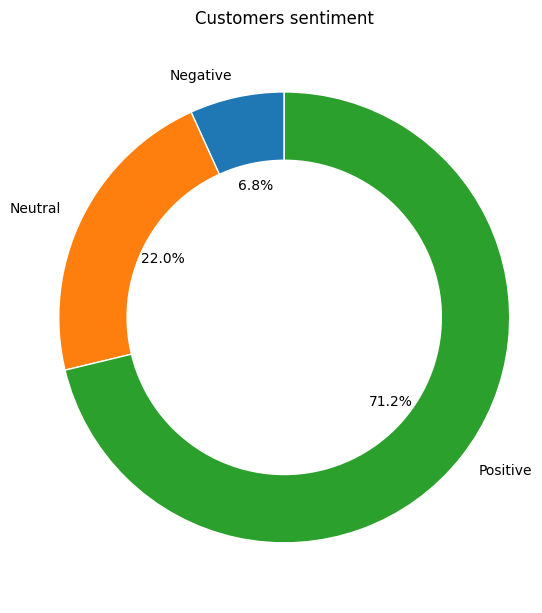

In [ ]:
# Class Labels
lab=['Negative','Neutral','Positive']

# Donut Plot
fig, ax = plt.subplots()
ax.pie(counts, labels=lab, autopct='%1.1f%%', startangle=90, wedgeprops={'edgecolor': 'white'})

# Adding a white circl at the center of the pie in order to create the donut
centre_circle = plt.Circle((0, 0), 0.7, fc='white')
fig.gca().add_artist(centre_circle)

# Avoiding that the plot seems like an ellips
ax.axis('equal')

# Title
plt.title("Customers sentiment")

# Margins
plt.subplots_adjust(top=1.3)

# Visualization
plt.show()


As we can note from  the plot, most of the reviews made by the customers concern a positive sentiment(71.2%) while the minority of the reviews express a negative sentiment.